## CS410 Computer Vision Assignment 1
## Camera Calibration
## Prof. John McDonald. (c) 2021. Not for redistribution.

### 1. Introduction
In this assignment you will be some real-world camera calibration data that includes a set of point correspondences consisting of 3D input (world) points and their 2D projections into the camera's image space. The objective of the assignment is to write a set of python functions which given these correspondences, calibrates the camera by computing the associated $3\times4$ camera matrix $\mathbf{P}$.

Don't worry if you are new to python; it's a very easy language to pick-up, and we will only be using some basic elements of the language along with the `numpy` library for numerical processing, and `matplotlib` for visualisation . In order to get you started you will a good primer is provided by the [onine SciPy Tutorial](https://scipy-lectures.github.io/). For the purposes of the assignment it is recommended you take some time to go through the first two chapters, providing and intro to python, the third chapter, providing an overview of using numpy, and the fourth chapter on plotting data. Note that as you work through the sections you can create a separate `jupyter` notebook to develop and test your understanding.

#### 1.1. Completion, Submission and Grading
The assignment notebook consists of a number of markdown and code cells. At various points in the code cells there are coding tasks for you to complete as specified in the `#STEP XX` comments. For each of these steps you are required to (i) complete the code, and, (ii) __comment your code__. Note that the comments are important in explaining what you are attempting to do in your code and how you are attempting to do it. Failure to adequately comment your code may results in no marks being awarded for that step.

Marks will be awarded for well commented correct __and__ efficient python code. Here, efficient means that you should be using numpy [indexing / slicing](https://numpy.org/doc/stable/reference/arrays.indexing.html) and appropriate numpy functions (e.g. [tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html), [hstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html), [ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), etc.) where possible, and in particular you should avoid loops (e.g. in iterating through the dataset). Note that if you can't figure out a slicing based solution, you should resort to a loop based approach.

If you're reading this as a python notebook, then you already have everthing setup and ready to go! In order to complete the assignment you should simply work down through the notebook, adding and completing each of the identified code sections. Once you have completed all section you should save your notebook to disk and upload the resulting .ipynb file through the moodle assignment link.

#### 1.2 Communication & Plagiarism Policy
As you work through the problem set and the related lecture and reading material you are encouraged to use the moodle CS410 class forum, the Microsoft Teams group, or direct email with John McDonald to post and discuss any questions that you have. Note that the teams group and the forum will be monitoredfor the duration of the assignment for any questions. __However, it is important to note that given that this work will count towards your final mark, the University Plagiarism Policy strictly applies to the assignment. In support of this policy and in order to maintain the integrity of the assessment process, individual students may be required to attend an online interview to discuss, explain, and validate their submission.__

### 2. Camera Calibration
The assignment notebook repository contains a `data.txt` file. This file contains a series of world point to image point correspondences from a real-world 3D camera calibration target. The figure below shows plots of the 3D points and 2D image projections, respectively.

The data matrix is a $N\times5$ matrix where each row defines an individual correspondence. The first three elements of each row define the $(X,Y,Z)$ world coordinates of the point. The fourth and fifth element of the row define the $(x,y)$ image coordinates of the point. 

#### 2.1 Imports
Before we start we first set the visualisation type to allow interactive visualisations, and import some libraries that we will use throughout the notebook

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#### 2.2 Loading and indexing the data
The cell below provides some example code for loading the data file and shows how to use some of the indexing features to select subsets of the data. Here, $\mathbf{P}$ and  $\mathbf{p}$ store the _inhomogeneous_ coordinates of the 3D and 2D points, respectively.

In [2]:
data = np.loadtxt('data.txt')

# Display the first 4 rows of data
print("First four full correspondences: \n", data[0:4,:])

P = data[:,0:3]
p = data[:,3:]

# Display the first 3 columns of the first 4 rows of data
print("First four 3D points: \n", P[0:4,:])

# Display the last 2 columns of the first 4 rows of data
print("First four 2D points: \n", p[0:4,:])


First four full correspondences: 
 [[ 15.       15.        0.      399.84936  32.31593]
 [ 30.       15.        0.      431.01832  31.23208]
 [ 45.       15.        0.      460.30066  30.27055]
 [ 60.       15.        0.      487.90473  29.458  ]]
First four 3D points: 
 [[15. 15.  0.]
 [30. 15.  0.]
 [45. 15.  0.]
 [60. 15.  0.]]
First four 2D points: 
 [[399.84936  32.31593]
 [431.01832  31.23208]
 [460.30066  30.27055]
 [487.90473  29.458  ]]


#### 2.3 Visualising the data
The next cell shows how to plot both the 2D and 3D points. Again, notice how the code uses `numpy` indexing to efficiently extract complete columns of the 3D and 2D point sets. The notebook uses matplotlib jupyter notebook widgets to provide interactive plots directly with the notebook. You should be able to rotate and enlarge the 3D points. The 2D plot cannot be rotated. If you don't have an interactive 3D widget, get in touch via the Microsoft Teams to let us know.

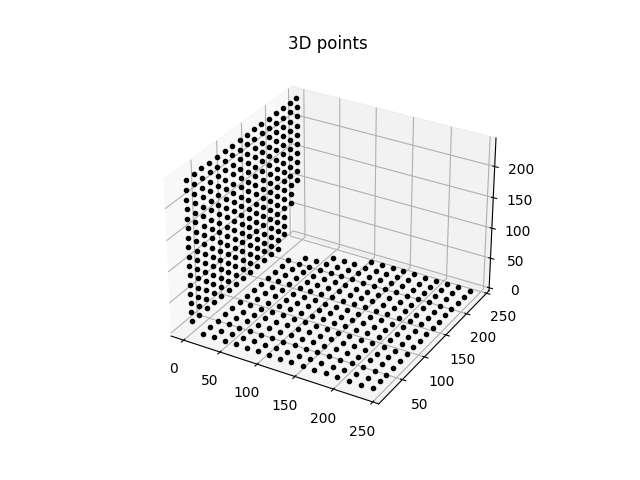

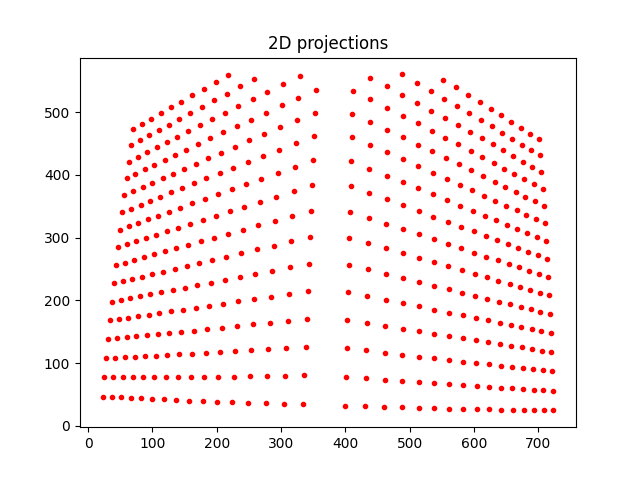

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
fig.canvas.toolbar_visible = False
ax.plot(P[:,0], P[:,1], P[:,2],'k.')
ax.set_title('3D points')
plt.show()

fig = plt.figure()
plt.plot(p[:,0], p[:,1],'r.')
fig.gca().set_title('2D projections')
plt.show()


Using the above data, your task over the next number of cells is to complete the code cells to takes this set of correspondences and estimate the perspective projection matrix of the camera. 

### 2. Conversion between Inhomogeneous and Homogeneous
Your first set of task is to complete the following two functions for convert to and from homogeneous coordinates. Remember that in converting from homogeneous you must account for the scale factor! 



In [4]:
def to_homogeneous(p):
    ''' Converts a set of inhomogenous points to their homogenous form
        Args:
            p (np.array): MxN numpy array of M N-D inhomogeneous coords
        
        Returns:
            np.array: Mx(N+1) numpy array M N-D homogeneous coords
    '''
    #STEP 1: Complete the code for this function
    
    # Here a vector of Mx1 is created to be appended as a column of 1's to the end of matrix p.
    num_rows = np.shape(p)[0]
    ones = np.ones((num_rows, 1))
    # 1's are appended at the end of matrix p.
    homogeneous_coords_matrix = np.append(p, ones, axis = 1)
    return homogeneous_coords_matrix
    
def to_inhomogeneous(hp):
    ''' Converts a set of homogenous points to their inhomogenous form
        Args:
            p (np.array): Mx(N+1) numpy array of M N-D homogeneous coords
        
        Returns:
            np.array: MxN numpy array M N-D inhomogeneous coords
    '''  
    #STEP 2: Complete the code for this function
    
    num_rows = np.shape(hp)[0]
    num_cols = np.shape(hp)[1]
    
    # A matrix of shape MxN is created.
    inhomogeneous_coords_matrix = np.zeros((num_rows, num_cols-1))
    
    # Here a loop is implemented to divide the x,y coords of the points by the z coord stored in the last column.
    # This is applied for all rows.
    for col in range(num_cols-1):
        inhomogeneous_coords_matrix[:,col] = hp[:,col] / hp[:, num_cols-1]
        
    return inhomogeneous_coords_matrix

Use the following cell to validate your functions

In [5]:
d = np.array([[1,1,1],[2,2,1],[3,2,-1]])
print("Inhomogenous 3D points: \n", d, end="\n\n" )

hd = to_homogeneous(d)
print("Homogenous 3D points: \n", hd, end="\n\n" )

scale_factors = np.random.rand(3,1)
scaled_points = scale_factors * hd
print("Scaled homogeneous 3D vectors: \n", scaled_points)
print("Inhomogenous 3D points: \n", to_inhomogeneous(scaled_points), end="\n\n" )

d = np.array([[1,1],[2,2],[3,2]])
print("Inhomogenous 2D points: \n", d, end="\n\n" )

hd = to_homogeneous(d)
print("Homogenous 2D points: \n", hd, end="\n\n" )

scale_factors = np.random.rand(3,1)
scaled_points = scale_factors * hd
print("Scaled homogeneous 2D vectors: \n", scaled_points)
print("Inhomogenous 2D points: \n", to_inhomogeneous(scaled_points), end="\n\n" )



Inhomogenous 3D points: 
 [[ 1  1  1]
 [ 2  2  1]
 [ 3  2 -1]]

Homogenous 3D points: 
 [[ 1.  1.  1.  1.]
 [ 2.  2.  1.  1.]
 [ 3.  2. -1.  1.]]

Scaled homogeneous 3D vectors: 
 [[ 0.98479698  0.98479698  0.98479698  0.98479698]
 [ 0.75948301  0.75948301  0.37974151  0.37974151]
 [ 1.04560779  0.69707186 -0.34853593  0.34853593]]
Inhomogenous 3D points: 
 [[ 1.  1.  1.]
 [ 2.  2.  1.]
 [ 3.  2. -1.]]

Inhomogenous 2D points: 
 [[1 1]
 [2 2]
 [3 2]]

Homogenous 2D points: 
 [[1. 1. 1.]
 [2. 2. 1.]
 [3. 2. 1.]]

Scaled homogeneous 2D vectors: 
 [[0.14339332 0.14339332 0.14339332]
 [1.45702439 1.45702439 0.72851219]
 [0.10361177 0.06907451 0.03453726]]
Inhomogenous 2D points: 
 [[1. 1.]
 [2. 2.]
 [3. 2.]]



In the course we saw how the camera calibration process can be cast as the solution to a homogeneous linear system of the form:
$$\mathbf{Ax}=\mathbf{0}$$

Complete the function below that takes the data matrix as input and returns the $\mathbf{A}$ matrix for the corresponding homogeneous linear system as output.

In [6]:
def construct_calibration_matrix(P,p):
    ''' Computes the calibration matrix for a given set of 2D to 3D corresponendences
        Args:
            P (np.array): Nx3 numpy array of 3D pointss where each row is of the form [X Y Z]
            p (np.array): Nx2 numpy array of 2D points where each row is of the form [x y]
        
        Returns:
            np.array: A matrix of shape 2Nx12 
    '''    
    #STEP 3: Complete the code for this function
    
    num_rowsP = np.shape(P)[0]
    # Matrix A of shape 2Nx12 is created.
    matrixA = np.zeros((2*num_rowsP, 12))
    
    # 3D points are converted to homogeneous coords to be added to matrix A.
    P_homogeneous = to_homogeneous(P)
    
    # Matrix A is filled here, the way it works is this:
    # - Even rows ( selected by '::2' ) are filled with [Px, Py, Pz, 1, 0, 0, 0, 0, -px*Px, -px*Py, -px*Pz, -px*1]
    # - Odd rows ( selected by '1::2' ) are filled with [0, 0, 0, 0, Px, Py, Pz, 1, -py*Px, -py*Py, -py*Pz, -py*1]
    # where Px, Py, Pz denote the 3D coords of a point and px,py denote the 2D coords of that point.
    
    # Fill the first 4 elements with the homogeneous P point.
    matrixA[::2,0:4] = P_homogeneous
    # Fill the next 4 elements with 0's.
    matrixA[::2, 4:8] = [0,0,0,0]
    # Multiply by -1 the x coord of all 2D points.
    negative_x_coord = -1*p[:,0]
    # Multiply each coord in an homogeneous P point by the negative correspondent x coord in 2D.
    matrixA[::2, 8:12] = P_homogeneous*negative_x_coord[:, np.newaxis]
    # Fill the first 4 elements with 0's.
    matrixA[1::2, 0:4] = [0,0,0,0]
    # Fill the next 4 elements with the homogeneous P point.
    matrixA[1::2, 4:8] = P_homogeneous
    # Multiply by -1 the y coord of all 2D points.
    negative_y_coord = -1*p[:,1]
    # Multiply each coord in an homogeneous P point by the negative correspondent y coord in 2D.
    matrixA[1::2, 8:12] = P_homogeneous*negative_y_coord[:, np.newaxis]
    return matrixA


Next you should complete the following function which given an $\mathbf{A}$ for a set of correspondences computes the $3\times4$ camera matrix 

In [7]:
def compute_homography(A):
    #STEP 4: Complete the code for this function
    # In order to estimate the camera matrix and solve Ax=0, I compute the SVD of matrix A^T*A 
    # to obtain its eigenvectors and eigenvalues.
    _, v, d = np.linalg.svd(np.matmul(A.T, A)) 
    
    # Here I pick the eigenvector corresponding to the minimum value in the matrix of eigenvalues v,
    # that is, the eigenvector corresponding to the lowest eigenvalue. 
    # This is the solution to the system which minimises the error.
    camera_mat = d[np.argmin(v)]
    # Now the eigenvector is reshaped into a matrix of shape 3x4 which corresponds to the camera matrix.
    camera_mat = camera_mat.reshape(3, 4)
    return camera_mat

(491, 2)


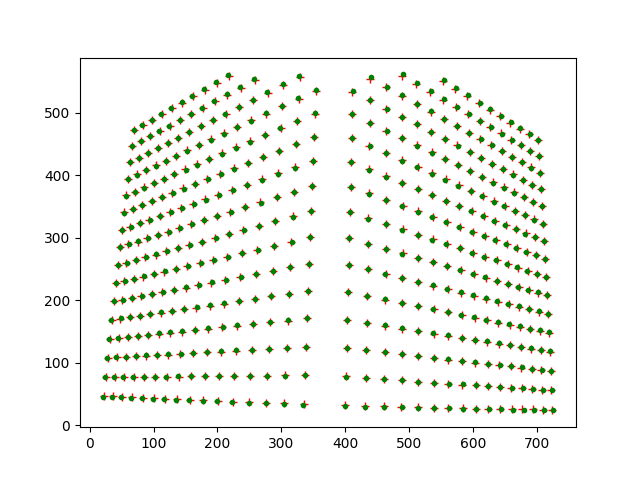

In [8]:
#STEP 6 Add the code here required to compute the camera matrix

# First, I obtain the callibration matrix A from the point correspondences.
callibration_matrix = construct_calibration_matrix(P,p)
# Then, I estimate the camera projection matrix solving the system Ax=0.
camera_matrix = compute_homography(callibration_matrix)

    
#STEP 7 Add the code here that using the computed camera matrix projects the 3D points to 2D
# The result should be assigned to the variable ipr in order for the visualisation code below to work

# Here I convert the 3D points to homogeneous coords.
P_homogeneous = to_homogeneous(P)

# Mutiply the 3D point by the camera matrix.
# This returns the 2D points in homogeneous coords.
p_estimated = np.matmul(camera_matrix, P_homogeneous.T)
# Finally, I convert the points to inhomogeneous coords.
ipr = to_inhomogeneous(p_estimated.T)

print(p.shape)

# This code will visualise the results by overlaying the projected points
# on the 2D calibration data. If your code has worked the two points sets should
# be well aligned
fig = plt.figure()
plt.plot(p[:,0], p[:,1],'r+')
plt.plot(ipr[:,0], ipr[:,1],'g.')
plt.show()

In [9]:
# STEP 8 In order to analyse the accuracy of your estimated camera matrix
# add code here that calculates the mean and standard deviation of the error (i.e. distance)
# between the projected and original 2D points.
distances = np.sqrt((p[:, 0] - ipr[:, 0])**2 + (p[:, 1] - ipr[:, 1])**2)
mean = np.mean(distances)
std = np.std(distances)
print("Mean pixel error: ", mean)
print("Standard deviation: ", std)

Mean pixel error:  0.8551259290830244
Standard deviation:  0.4300194829143737
